In [132]:
import torch
print(f"CUDA Available: {torch.cuda.is_available()}")
print(f"Device Name: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'No GPU detected'}")
print(torch.cuda.is_available())

CUDA Available: True
Device Name: NVIDIA GeForce RTX 3070 Ti
True


In [133]:
import pandas as pd

# Load datasets
train_df = pd.read_csv(r"C:\Users\adamj\Documents\code\python\Comp_photo_proj\google-landmark\train.csv")
hierarchical_df = pd.read_csv(r"C:\Users\adamj\Documents\code\python\Comp_photo_proj\google-landmark\train_label_to_hierarchical.csv")

# Merge datasets
merged_df = pd.merge(train_df, hierarchical_df, on="landmark_id", how="inner")

# Filter relevant columns
merged_df = merged_df[["id", "url", "landmark_id", "category", "hierarchical_label","natural_or_human_made"]]
merged_df = merged_df.dropna(subset=["hierarchical_label", "natural_or_human_made"])
# Save merged data
merged_df.to_csv("merged_train.csv", index=False)





In [134]:
print(f"Duplicates in train.csv: {train_df.duplicated().sum()}")
print(f"Duplicates in train_label_to_hierarchical.csv: {hierarchical_df.duplicated().sum()}")
print(f"Number of rows after merge: {len(merged_df)}")
duplicated_landmarks = merged_df[merged_df.duplicated(subset="landmark_id", keep=False)]

# Display duplicates
print(f"Number of duplicated landmark_ids: {duplicated_landmarks['landmark_id'].nunique()}")
print(duplicated_landmarks.head())

Duplicates in train.csv: 0
Duplicates in train_label_to_hierarchical.csv: 0
Number of rows after merge: 2416940
Number of duplicated landmark_ids: 96950
                 id                                                url  \
0  202cd79556f30760  http://upload.wikimedia.org/wikipedia/commons/...   
1  380ca47156ef85f3  https://upload.wikimedia.org/wikipedia/commons...   
2  f3a5002b94adfa6c  https://upload.wikimedia.org/wikipedia/commons...   
3  7b23250b0959f667  https://upload.wikimedia.org/wikipedia/commons...   
4  3daa23ddb7937b07  https://upload.wikimedia.org/wikipedia/commons...   

   landmark_id                                           category  \
0       104169  http://commons.wikimedia.org/wiki/Category:Sti...   
1       104169  http://commons.wikimedia.org/wiki/Category:Sti...   
2       104169  http://commons.wikimedia.org/wiki/Category:Sti...   
3       104169  http://commons.wikimedia.org/wiki/Category:Sti...   
4       104169  http://commons.wikimedia.org/wiki/Categor

In [135]:
import os


image_dir = r"filtered_images"
existing_images = set(os.listdir(image_dir))

# Keep only rows where the 'id' corresponds to an existing image
filtered_df = merged_df[merged_df["id"].apply(lambda x: f"{x}.jpg").isin(existing_images)]

# Sample from filtered data
filtered_df = filtered_df.sample(n=min(3050, len(filtered_df)), random_state=42)
filtered_df.to_csv("filtered_train.csv", index=False)

print(f"Filtered dataset size: {len(filtered_df)}")

# Load the filtered CSV
filtered_df = pd.read_csv("filtered_train.csv")

# Print key information
print(filtered_df.head())  # Display the first few rows
print(f"Number of rows: {len(filtered_df)}")
print(f"Number of unique landmark IDs: {filtered_df['landmark_id'].nunique()}")


Filtered dataset size: 2510
                 id                                                url  \
0  b7b8cd757498aeff  https://upload.wikimedia.org/wikipedia/commons...   
1  71b12f025b6be555  https://upload.wikimedia.org/wikipedia/commons...   
2  842f4d514d689d72  https://upload.wikimedia.org/wikipedia/commons...   
3  88a64c9dd6a515ab  https://upload.wikimedia.org/wikipedia/commons...   
4  421faead1c16894f  http://upload.wikimedia.org/wikipedia/commons/...   

   landmark_id                                           category  \
0       188755  http://commons.wikimedia.org/wiki/Category:Chi...   
1       183393  http://commons.wikimedia.org/wiki/Category:%C3...   
2        76336  http://commons.wikimedia.org/wiki/Category:Par...   
3        90966  http://commons.wikimedia.org/wiki/Category:Tin...   
4       147682  http://commons.wikimedia.org/wiki/Category:Sai...   

  hierarchical_label natural_or_human_made  
0            library            human-made  
1             church  

In [136]:
'''
import pandas as pd
import os
import requests

# Load the filtered CSV
filtered_df = pd.read_csv("filtered_train.csv")

# Create a directory to store images
output_dir = "filtered_images"
os.makedirs(output_dir, exist_ok=True)

# Define headers to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}

# Download images
for index, row in filtered_df.iterrows():
    image_id = row['id']
    url = row['url']
    output_path = os.path.join(output_dir, f"{image_id}.jpg")
    try:
        response = requests.get(url, headers=headers, stream=True, timeout=10)
        if response.status_code == 200:
            with open(output_path, "wb") as f:
                f.write(response.content)
            print(f"Downloaded {image_id}")
        else:
            print(f"Failed to download {image_id}: {response.status_code}")
    except Exception as e:
        print(f"Error downloading {image_id}: {e}")
'''

'\nimport pandas as pd\nimport os\nimport requests\n\n# Load the filtered CSV\nfiltered_df = pd.read_csv("filtered_train.csv")\n\n# Create a directory to store images\noutput_dir = "filtered_images"\nos.makedirs(output_dir, exist_ok=True)\n\n# Define headers to mimic a browser\nheaders = {\n    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"\n}\n\n# Download images\nfor index, row in filtered_df.iterrows():\n    image_id = row[\'id\']\n    url = row[\'url\']\n    output_path = os.path.join(output_dir, f"{image_id}.jpg")\n    try:\n        response = requests.get(url, headers=headers, stream=True, timeout=10)\n        if response.status_code == 200:\n            with open(output_path, "wb") as f:\n                f.write(response.content)\n            print(f"Downloaded {image_id}")\n        else:\n            print(f"Failed to download {image_id}: {response.status_code}")\n    except Exception as e:\n      

In [137]:
import pandas as pd

# Load the merged dataset
filtered_df = pd.read_csv("merged_train.csv")

filtered_df = filtered_df[filtered_df["id"].apply(lambda x: f"{x}.jpg").isin(existing_images)]
print(filtered_df.head)
# Encode hierarchical_label and natural_or_human_made
from sklearn.preprocessing import LabelEncoder
label_encoder_hierarchical = LabelEncoder()
label_encoder_natural = LabelEncoder()

filtered_df["hierarchical_label_encoded"] = label_encoder_hierarchical.fit_transform(filtered_df["hierarchical_label"])
filtered_df["natural_or_human_made_encoded"] = label_encoder_natural.fit_transform(filtered_df["natural_or_human_made"])

# Save the dataset for training
filtered_df.to_csv("multi_task_train.csv", index=False)

print(f"Number of hierarchical labels: {filtered_df['hierarchical_label_encoded'].nunique()}")
print(f"Number of natural/human-made categories: {filtered_df['natural_or_human_made_encoded'].nunique()}")
print(f"Dataset size: {len(filtered_df)}")



# Add the `label` column
# unique_landmarks = filtered_df["landmark_id"].unique()
# landmark_to_index = {landmark_id: idx for idx, landmark_id in enumerate(unique_landmarks)}
# filtered_df["label"] = filtered_df["landmark_id"].map(landmark_to_index)

# # Save the mapped dataset
# filtered_df.to_csv("mapped_train.csv", index=False)

# print(f"Number of classes: {len(unique_landmarks)}")

<bound method NDFrame.head of                       id                                                url  \
0       202cd79556f30760  http://upload.wikimedia.org/wikipedia/commons/...   
1       380ca47156ef85f3  https://upload.wikimedia.org/wikipedia/commons...   
208     4072182eddd0100e  https://upload.wikimedia.org/wikipedia/commons...   
647     6f31b874d1a4d489  https://upload.wikimedia.org/wikipedia/commons...   
801     16d8aa057cdd01b9  http://upload.wikimedia.org/wikipedia/commons/...   
...                  ...                                                ...   
276695  9965a469f25d6e74  https://upload.wikimedia.org/wikipedia/commons...   
276699  0386f226f3f52d73  https://upload.wikimedia.org/wikipedia/commons...   
276707  b3fc5febfe655f44  https://upload.wikimedia.org/wikipedia/commons...   
276711  8991033fac988bbf  https://upload.wikimedia.org/wikipedia/commons...   
276716  06b560cd51da7227  https://upload.wikimedia.org/wikipedia/commons...   

        landmark_id  

In [138]:
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms

from torch.utils.data import Dataset
from PIL import Image

class LandmarkDataset(Dataset):
    def __init__(self, csv_file, image_dir, transform=None):
        """
        Args:
            csv_file (DataFrame): Pandas DataFrame containing the dataset.
            image_dir (str): Path to the directory containing images.
            transform (callable, optional): Transform to be applied to each image.
        """
        self.data = csv_file
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Get image metadata from the CSV
        row = self.data.iloc[idx]
        image_id = row['id']
        label_hierarchical = row['hierarchical_label_encoded']
        label_natural = row['natural_or_human_made_encoded']

        label_hierarchical = torch.tensor(label_hierarchical, dtype=torch.long)
        label_natural = torch.tensor(label_natural, dtype=torch.long)


        # Load the image
        image_path = f"{self.image_dir}/{image_id}.jpg"
        image = Image.open(image_path).convert("RGB")

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        # Return image and both labels as a tuple
        return image, (label_hierarchical, label_natural)



In [139]:
# Define preprocessing transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),         # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])


In [140]:
import torch.nn as nn
from torchvision.models import resnet50
import torch

# Define device based on availability of CUDA (for NVIDIA GPUs) or fallback to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pre-trained ResNet50 model
model = resnet50(pretrained=True)

# Create two separate heads for the tasks
num_hierarchical_labels = filtered_df["hierarchical_label_encoded"].nunique()
num_natural_labels = filtered_df["natural_or_human_made_encoded"].nunique()

# Replace the original fully connected layer
model.fc = nn.Identity()  # Remove the existing fully connected layer

class MultiTaskModel(nn.Module):
    def __init__(self, base_model, num_hierarchical_labels, num_natural_labels):
        super(MultiTaskModel, self).__init__()
        
        # Use the base model without the last fully connected layer
        self.base = nn.Sequential(*list(base_model.children())[:-1])
        
        # Output features from the penultimate layer
        in_features = base_model.fc.in_features
        
        # Two separate heads for multi-task learning
        self.head_hierarchical = nn.Linear(in_features, num_hierarchical_labels)
        self.head_natural = nn.Linear(in_features, num_natural_labels)

    def forward(self, x):
        # Extract features using the base model
        features = self.base(x)
        features = features.view(features.size(0), -1)  # Flatten for linear layers

        # Output predictions for both tasks
        hierarchical_out = self.head_hierarchical(features)
        natural_out = self.head_natural(features)
        return hierarchical_out, natural_out

# Example: Adjust the model for two tasks
from torchvision.models import resnet50

# Load pre-trained ResNet50
base_model = resnet50(pretrained=True)

hierarchical_encoder = LabelEncoder()
filtered_df["hierarchical_label_encoded"] = hierarchical_encoder.fit_transform(filtered_df["hierarchical_label"])

# Encode natural_or_human_made
natural_encoder = LabelEncoder()
filtered_df["natural_or_human_made_encoded"] = natural_encoder.fit_transform(filtered_df["natural_or_human_made"])

# Save the encoded classes for reference
num_hierarchical_labels = len(hierarchical_encoder.classes_)
num_natural_labels = len(natural_encoder.classes_)

# Initialize the multi-task model
multi_task_model = MultiTaskModel(base_model, num_hierarchical_labels, num_natural_labels)


# Move the model to the correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
multi_task_model = multi_task_model.to(device)

# Print model summary
print(multi_task_model)



c:\Users\adamj\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\adamj\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MultiTaskModel(
  (base): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(

In [141]:
import torch.optim as optim
from tqdm import tqdm
# Define loss functions
def train_model(model, train_loader, val_loader, optimizer, num_epochs=10):
    criterion_hierarchical = nn.CrossEntropyLoss()
    criterion_natural = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_hierarchical, correct_natural = 0, 0
        total = 0

        for batch_idx, (images, (labels_hierarchical, labels_natural)) in enumerate(tqdm(train_loader)):
            # Debug: Check the shape of the data
            
            images = images.to(device)
            labels_hierarchical = labels_hierarchical.to(device)
            labels_natural = labels_natural.to(device)

            # Forward pass
            optimizer.zero_grad()
            out_hierarchical, out_natural = model(images)

            # Compute losses
            loss_hierarchical = criterion_hierarchical(out_hierarchical, labels_hierarchical)
            loss_natural = criterion_natural(out_natural, labels_natural)
            loss = loss_hierarchical + loss_natural  # Combine losses

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Update metrics
            running_loss += loss.item()
            _, predicted_hierarchical = torch.max(out_hierarchical, 1)
            _, predicted_natural = torch.max(out_natural, 1)
            total += labels_hierarchical.size(0)
            correct_hierarchical += (predicted_hierarchical == labels_hierarchical).sum().item()
            correct_natural += (predicted_natural == labels_natural).sum().item()

        accuracy_hierarchical = correct_hierarchical / total
        accuracy_natural = correct_natural / total

        print(f"Epoch {epoch + 1}/{num_epochs}")
        print(f"Train Loss: {running_loss / len(train_loader):.4f}")
        print(f"Hierarchical Accuracy: {accuracy_hierarchical:.4f}")
        print(f"Natural/Human-made Accuracy: {accuracy_natural:.4f}")
        


# Initialize model, optimizer, and loaders
num_hierarchical_labels = filtered_df['hierarchical_label'].nunique()
num_natural_labels = filtered_df['natural_or_human_made'].nunique()

multi_task_model = MultiTaskModel(base_model, num_hierarchical_labels, num_natural_labels)
multi_task_model = multi_task_model.to(device)

# Define optimizer
optimizer = optim.Adam(multi_task_model.parameters(), lr=0.001)


In [142]:
from torch.utils.data import DataLoader, random_split


# Initialize dataset
dataset = LandmarkDataset(csv_file=filtered_df, image_dir=image_dir, transform=transform)

# Split the dataset
train_size = int(0.7 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_data, val_data, test_data = random_split(dataset, [train_size, val_size, test_size])


print(f"Train size: {train_size}, Val size: {val_size}, Test size: {test_size}")

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

print(f"Train data size: {len(train_data)}")
print(f"Validation data size: {len(val_data)}")
print(f"Test data size: {len(test_data)}")




Train size: 1757, Val size: 502, Test size: 251
Train data size: 1757
Validation data size: 502
Test data size: 251


In [143]:
for images, (labels_hierarchical, labels_natural) in train_loader:
    print(f"Images batch shape: {images.shape}")
    print(f"Hierarchical labels batch: {labels_hierarchical}")
    print(f"Natural labels batch: {labels_natural}")
    break

Images batch shape: torch.Size([32, 3, 224, 224])
Hierarchical labels batch: tensor([26, 16, 42, 16, 57, 24, 16, 13, 17, 13, 66, 13, 27, 17, 16, 31, 42, 44,
        32, 26, 16, 16, 16,  4, 46, 31,  4, 41,  9, 15, 39, 57])
Natural labels batch: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0])


In [144]:
print(train_model)

train_model(multi_task_model, train_loader, val_loader, optimizer, num_epochs=10)

<function train_model at 0x0000022B45A11EE0>


100%|██████████| 55/55 [01:58<00:00,  2.16s/it]


Epoch 1/10
Train Loss: 3.9203
Hierarchical Accuracy: 0.2146
Natural/Human-made Accuracy: 0.7513


100%|██████████| 55/55 [01:56<00:00,  2.12s/it]


Epoch 2/10
Train Loss: 3.5573
Hierarchical Accuracy: 0.2573
Natural/Human-made Accuracy: 0.7729


100%|██████████| 55/55 [01:56<00:00,  2.12s/it]


Epoch 3/10
Train Loss: 3.3911
Hierarchical Accuracy: 0.2760
Natural/Human-made Accuracy: 0.8093


100%|██████████| 55/55 [01:56<00:00,  2.12s/it]


Epoch 4/10
Train Loss: 3.2684
Hierarchical Accuracy: 0.3011
Natural/Human-made Accuracy: 0.8059


100%|██████████| 55/55 [01:57<00:00,  2.13s/it]


Epoch 5/10
Train Loss: 3.1040
Hierarchical Accuracy: 0.3204
Natural/Human-made Accuracy: 0.8401


100%|██████████| 55/55 [01:59<00:00,  2.17s/it]


Epoch 6/10
Train Loss: 3.0504
Hierarchical Accuracy: 0.3210
Natural/Human-made Accuracy: 0.8401


100%|██████████| 55/55 [01:59<00:00,  2.18s/it]


Epoch 7/10
Train Loss: 2.8977
Hierarchical Accuracy: 0.3472
Natural/Human-made Accuracy: 0.8623


100%|██████████| 55/55 [01:59<00:00,  2.18s/it]


Epoch 8/10
Train Loss: 2.7902
Hierarchical Accuracy: 0.3728
Natural/Human-made Accuracy: 0.8674


100%|██████████| 55/55 [01:59<00:00,  2.18s/it]


Epoch 9/10
Train Loss: 2.6248
Hierarchical Accuracy: 0.3830
Natural/Human-made Accuracy: 0.8941


100%|██████████| 55/55 [01:59<00:00,  2.17s/it]

Epoch 10/10
Train Loss: 2.4810
Hierarchical Accuracy: 0.4081
Natural/Human-made Accuracy: 0.9152


In [145]:
import torch


print(f"Allocated memory: {torch.cuda.memory_allocated() / 1024**3:.2f} GB")
print(f"Cached memory: {torch.cuda.memory_reserved() / 1024**3:.2f} GB")


Allocated memory: 1.32 GB
Cached memory: 4.04 GB


In [146]:
torch.cuda.empty_cache()  # Clears cached memory


In [148]:
import torch
from tqdm import tqdm

def test_model(model, test_loader):
    """
    Test the multi-task model on the test dataset.
    
    Args:
        model (nn.Module): Trained multi-task model.
        test_loader (DataLoader): DataLoader for the test dataset.
    """
    # Set the model to evaluation mode
    model.eval()

    # Initialize variables to track performance
    correct_hierarchical, correct_natural = 0, 0
    total = 0

    # Disable gradient computation for testing
    with torch.no_grad():
        for images, (labels_hierarchical, labels_natural) in tqdm(test_loader):
            # Move data to the same device as the model
            images = images.to(device)
            labels_hierarchical = labels_hierarchical.to(device)
            labels_natural = labels_natural.to(device)

            # Forward pass
            outputs_hierarchical, outputs_natural = model(images)

            # Get predictions
            _, predicted_hierarchical = torch.max(outputs_hierarchical, 1)
            _, predicted_natural = torch.max(outputs_natural, 1)

            # Update counts
            total += labels_hierarchical.size(0)
            correct_hierarchical += (predicted_hierarchical == labels_hierarchical).sum().item()
            correct_natural += (predicted_natural == labels_natural).sum().item()

    # Calculate accuracy for both tasks
    hierarchical_accuracy = 100.0 * correct_hierarchical / total
    natural_accuracy = 100.0 * correct_natural / total

    # Print results
    print(f"Test Results:")
    print(f"Hierarchical Label Accuracy: {hierarchical_accuracy:.2f}%")
    print(f"Natural vs. Human-Made Accuracy: {natural_accuracy:.2f}%")

# Run the test
test_model(multi_task_model, test_loader)



100%|██████████| 8/8 [00:16<00:00,  2.03s/it]

Test Results:
Hierarchical Label Accuracy: 24.70%
Natural vs. Human-Made Accuracy: 84.46%


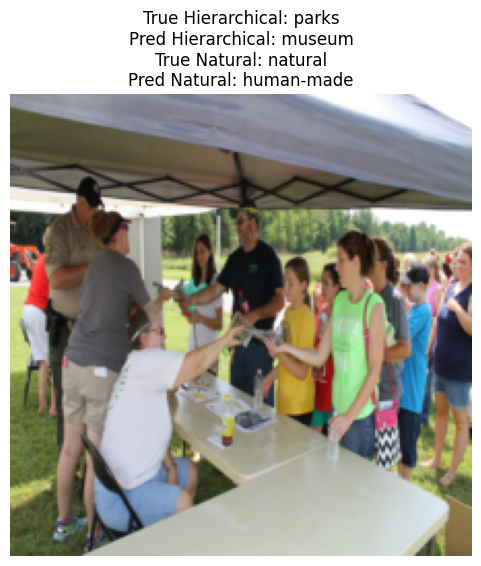

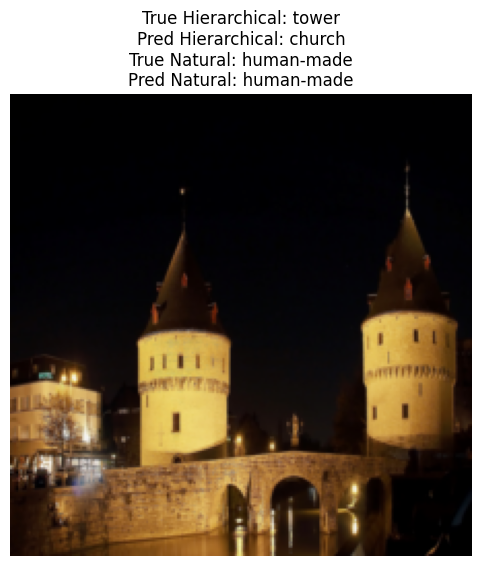

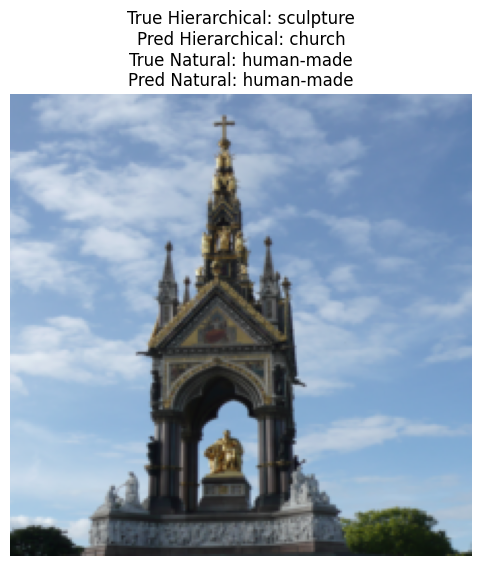

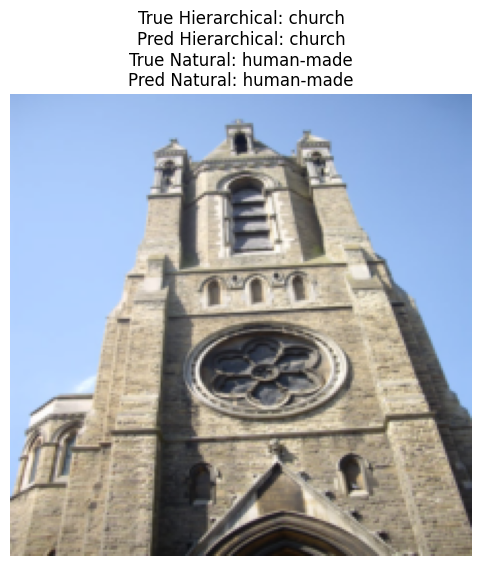

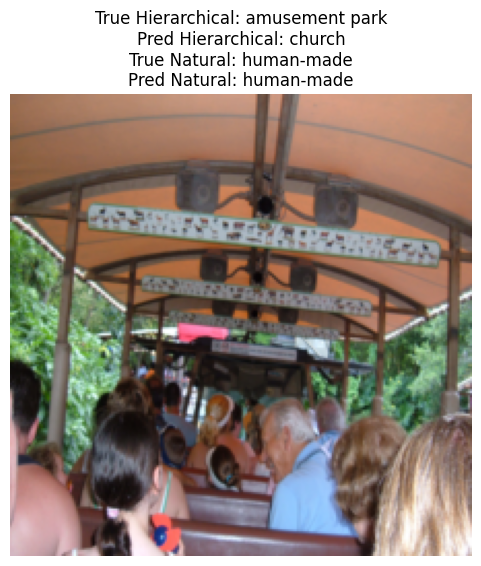

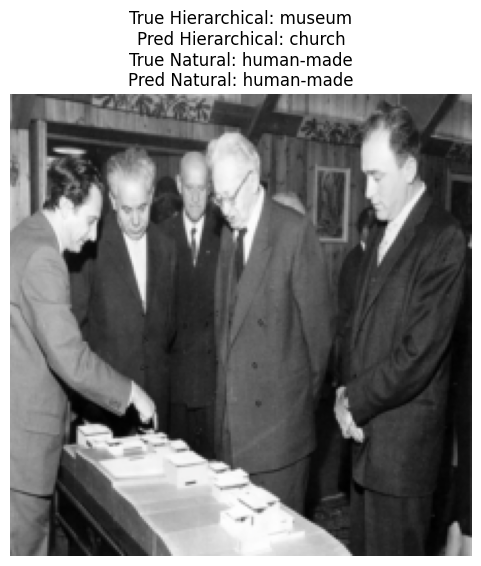

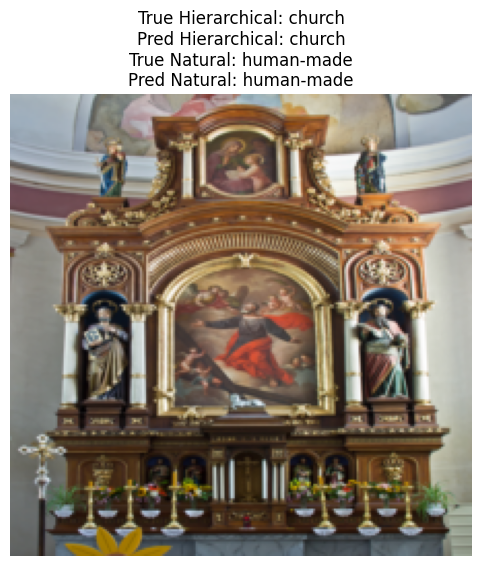

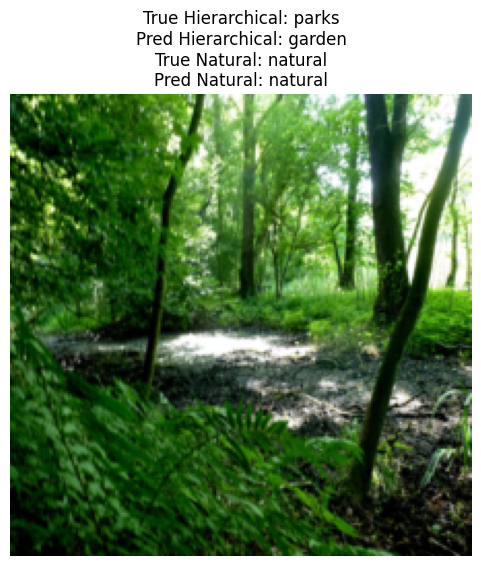

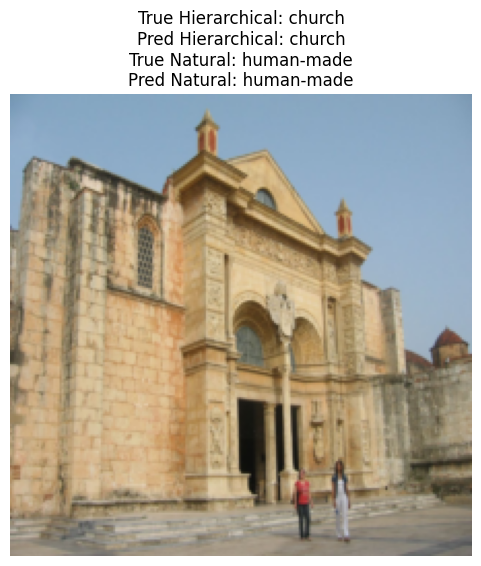

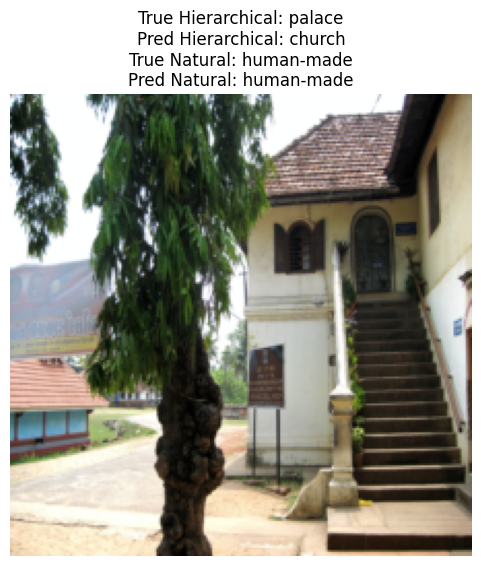

In [152]:
import matplotlib.pyplot as plt
import numpy as np

def show_predictions(model, test_loader, num_images=5):
    """
    Display predictions for a few images from the test dataset.
    
    Args:
        model (nn.Module): Trained multi-task model.
        test_loader (DataLoader): DataLoader for the test dataset.
        num_images (int): Number of images to display.
    """
    # Set the model to evaluation mode
    model.eval()

    # Get label encoders for decoding
    hierarchical_classes = hierarchical_encoder.classes_
    natural_classes = natural_encoder.classes_

    # Disable gradient computation
    with torch.no_grad():
        # Track the number of images displayed
        count = 0
        
        for images, (labels_hierarchical, labels_natural) in test_loader:
            # Move data to the same device as the model
            images = images.to(device)

            # Forward pass
            outputs_hierarchical, outputs_natural = model(images)

            # Get predictions
            _, predicted_hierarchical = torch.max(outputs_hierarchical, 1)
            _, predicted_natural = torch.max(outputs_natural, 1)

            # Loop through the batch and display images
            for i in range(images.size(0)):
                if count >= num_images:
                    return
                
                # Get the image, true labels, and predictions
                image = images[i].cpu().numpy().transpose(1, 2, 0)
                true_hierarchical = hierarchical_classes[labels_hierarchical[i].cpu().item()]
                true_natural = natural_classes[labels_natural[i].cpu().item()]
                pred_hierarchical = hierarchical_classes[predicted_hierarchical[i].cpu().item()]
                pred_natural = natural_classes[predicted_natural[i].cpu().item()]

                # Denormalize the image for display
                image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
                image = np.clip(image, 0, 1)

                # Plot the image and labels
                plt.figure(figsize=(6, 6))
                plt.imshow(image)
                plt.title(
                    f"True Hierarchical: {true_hierarchical}\n"
                    f"Pred Hierarchical: {pred_hierarchical}\n"
                    f"True Natural: {true_natural}\n"
                    f"Pred Natural: {pred_natural}"
                )
                plt.axis('off')
                plt.show()

                count += 1

# Display predictions for 5 images
show_predictions(multi_task_model, test_loader, num_images=10)
